On veut modéliser un circuit RC en **parallèle**. 

On commence par appeler les bibliothéques pertinentes : 


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use('ggplot') #le style visuel du graphique

Le module ***odeint*** nous permet de résoudre une équation differentielle (ODE - ordinary differential equation; int - integration).

Définisson donc une foncton, qui nous donne l'équation d'un circuit RC en série (en charge) :
$$ \dfrac{d u_c}{dt} = -\dfrac{1}{RC}u_c + \dfrac{E}{RC}$$
ainsi la fonction pour le circuit de décharge:
$$ \dfrac{d u_c}{dt} = -\dfrac{1}{RC}u_c $$


In [ ]:
def RCcharge(uc,t) : 
   return  -1/(R*C)*uc + E/(R*C)

def RCdecharge(uc,t) : 
   return  -1/(R*C)*uc

Définissions les paramètres du circuit alors:


In [ ]:
t = np.linspace(0,2,1000) # abscisse du temps
R = 1000  # résistance R
C = 1e-4  # capacité du condesateur
E = 20    # Tension du générateur

Et les conditions initiales (nécessaire pour résoudre l'éq. diff.: 


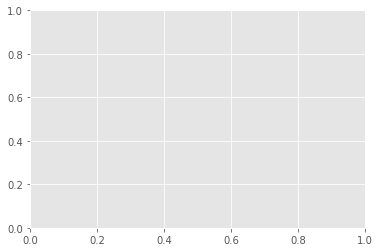

In [ ]:
u0 = 0 

fig, ax= plt.subplots()

Essayons avec les valeurs suivantes:

In [ ]:
#R = 1000
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=1000\Omega$')

#R = 500
R = 500
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=500\Omega$')

Configurons le graphique:


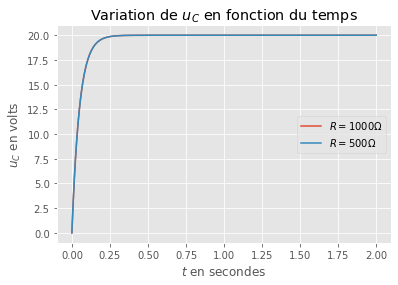

In [ ]:
fig, ax= plt.subplots()

#R = 1000
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=1000\Omega$')

#R = 500
R = 500
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=500\Omega$')

ax.set_title('Variation de $u_C$ en fonction du temps ')
ax.set_xlabel('$t$ en secondes')
ax.set_ylabel('$u_C$ en volts')
ax.legend()

plt.grid(True)
plt.legend(loc='right')
plt.show()

Visualisons le graphique 


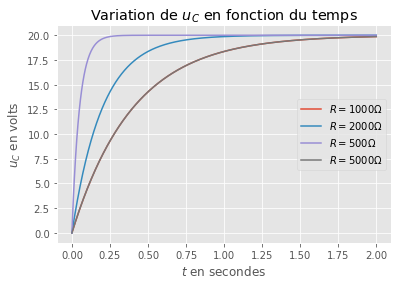

In [ ]:
u0 = 0 #initial condition

fig, ax= plt.subplots()

uc = odeint(RCcharge, u0, t)

#R = 1000
ax.plot(t,uc, label='$R=1000\Omega$')

#R = 2000
R = 2000
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=2000\Omega$')

#R = 500
R = 500
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=500\Omega$')

#R = 4000
R = 4000
uc = odeint(RCcharge, u0, t)
ax.plot(t,uc, label='$R=4000\Omega$')



ax.set_title('Variation de $u_C$ en fonction du temps ')
ax.set_xlabel('$t$ en secondes')
ax.set_ylabel('$u_C$ en volts')
ax.legend()

#plt.xkcd()
plt.grid(True)
plt.legend(loc='right')
plt.show()

RLC 


Coefficient d'amortissement : 0


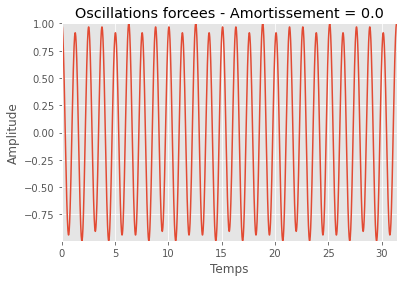

In [4]:

# -*- coding: utf-8 -*-

# Programme de simulation d'un circuit RLC en oscillations forcÃ©es
# Dominique Lefebvre pour TangenteX.com
# 15 janvier 2015
#

# importation des librairies
from numpy import array,arange,pi,cos
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
       
# dÃ©finition des constantes du circuit RLC
Omega0 = 5.  # Pulsation propre du circuit  

# dÃ©finition des paramÃ¨tres du forÃ§age
A = 1.       # amplitude
OmegaF = 2.  # pulsation de forÃ§age
phi = 0.     # phase du forÃ§age


# fonction de dÃ©finition du circuit RLC
def RLC(y,t):
    u,u_dot = y
    u_dot_dot = -K*u_dot - Omega0**2*u + A*cos(OmegaF*t + phi) 
    return [u_dot,u_dot_dot]   

# saisie du coefficent d'amortissement
K = float(input("Coefficient d'amortissement : "))

# conditions initiales
u0 = 1      
du0 = 0
C0 = array([u0,du0])

# dÃ©finition du vecteur temps de l'expÃ©rience
t0 = 0.0
tmax = 10*pi
pastemps = 0.01
time = arange(t0, tmax, pastemps)

# intÃ©gration du systÃ¨me
y = odeint(RLC,C0,time)

# affichage de l'Ã©volution de la tension aux bornes de C
plt.figure()
plt.xlim(t0,tmax)
plt.ylim(y[:,0].min(),y[:,0].max())
plt.plot(time, y[:,0])
plt.title('Oscillations forcees - Amortissement = ' + str(K))
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.show()

RLC Alt

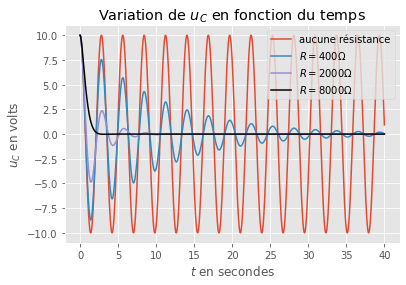

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

def dXdt(X,t) : 
   return  [X[1], [-R/L*X[1]] -1/(L*C)*X[0] + E/L]

t = np.linspace(0,40,1000)
R = 0
C = 1e-4
L = 2000
E = 0

X0 = [10,0] #initial condition
u0 = 20 #initial condition

fig, ax= plt.subplots()

Z = odeint(dXdt, X0, t)
uc = Z[:,0]

ax.plot(t,uc, label='aucune résistance')

# #R = 100
# R = 100
# Z = odeint(dXdt, X0, t)
# uc = Z[:,0]
# ax.plot(t,uc, label='$R=100\Omega$')

#R = 400
R = 400
Z = odeint(dXdt, X0, t)
uc = Z[:,0]
ax.plot(t,uc, label='$R=400\Omega$')

# #R = 1000
# R = 1000
# Z = odeint(dXdt, X0, t)
# uc = Z[:,0]
# ax.plot(t,uc, label='$R=1000\Omega$')

#R = 2000
R = 2000
Z = odeint(dXdt, X0, t)
uc = Z[:,0]
ax.plot(t,uc, label='$R=2000\Omega$')

#R = 8000
R = 8000
Z = odeint(dXdt, X0, t)
uc = Z[:,0]
ax.plot(t,uc, 'k-', label='$R=8000\Omega$')

ax.set_title('Variation de $u_C$ en fonction du temps ')
ax.set_xlabel('$t$ en secondes')
ax.set_ylabel('$u_C$ en volts')
ax.legend()

#plt.xkcd()
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

